## Análise Exploratória de Dados : Base de Comunicação de Acidente de trabalho (CAT) de janeiro a março de 2020
by [Gilson Castro](https://github.com/gilsoncastro)


### Descrição do problema 

Um laborátório de inovação em [segurança ocupacional](https://pt.wikipedia.org/wiki/Seguran%C3%A7a_e_sa%C3%BAde_ocupacionais) de uma grande empresa pretende fazer um estudo sobre os acidentes de trabalho no Brasil  tendo como objetivo desenvolver serviços e produtos para amenizar o problema . Para realizar a análise , contratou um **analista de dados** ( especialista em [economia do trabalho](https://pt.wikipedia.org/wiki/Economia_do_trabalho) , este mesmo decidiu realizar uma análise explorátória de dados com o objetivo de obter alguns insights , testar algumas hipóteses em torno da base de dados fornecida pelo laborátorio.
 
O analista de dados em uma reunião com o time de pesquisadores elaborou 8 perguntas para responder através da **análise explorária**:

1) Qual a quantidade de pessoas que recorreu o CAT por sexo ?

2) Qual a quantidade de responsável ( **empregador, sindicato, médico, segurado, autoridade pública**) pela emissão da CAT ?

3) Quais são as 5 maiores partes do corpo atingida ?

4) Qual o tipo de acidente mais comum ?

5) Quais as 5 maiores classificação Brasileira de Ocupações apresenta um número elevado de acidentes ?

6) Quais lesões são mais frequentes ?

8) Onde estão os empregadores ?

### Base de dados :

 O [Conjunto de dados](https://dadosabertos.dataprev.gov.br/dataset/comunicacao-de-acidente-de-trabalho-cat) escolhido é advindo de um serviço chamado Registros [Comunicação de Acidente de Trabalho - CAT](https://www.gov.br/pt-br/servicos/registrar-comunicacao-de-acidente-de-trabalho-cat) , nesse sistema o trabalhador , empregador registra uma acidente de trabalho ou trajeto . Esse serviço tem uma certa facilidade para quem sofre um acidente pois não precisa comparecer na agência do INSS.
 
 [Leia mais aqui](https://conect.online/blog/entenda-o-que-e-cat-e-por-que-ele-e-importante/)


In [87]:
#importando bibliotecas
import numpy as np
import pandas as pd
from os import path
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#carregando os dados
df=pd.read_csv('catt2020.csv',sep=';',encoding='latin1')

In [3]:
#visualizando as primeiras linhas do dataset
df.head()

,Agente Causador Acidente,Data Acidente,CBO,CBO.1,CID-10,CID-10.1,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,...,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Afastamento,Data Despacho Benefício,Data Acidente.1,Data Nascimento,Data Emissão CAT
0,"Vidraria, Fibra de V",2020/01,322230,322230-Auxiliar de E,S610,S61.0 Ferim de Dedos,9491,Atividades de Organi,Empregador,Pa,...,Dedo,Feminino,Típico,Maranhão,São Paulo,0000/00,0000/00,01/01/2020,07/09/1977,02/01/2020
1,Agente Infeccioso ou,2020/01,322205,322205-Tec. de Enfer,Z209,Z20.9 Contato Exposi,8610,Atividades de Atendi,Empregador,Pa,...,Dedo,Feminino,Típico,,Ceará,0000/00,0000/00,02/01/2020,27/11/1987,02/01/2020
2,,2020/01,322205,322205-Tec. de Enfer,Y289,Y28.9 Local Ne,8610,Atividades de Atendi,Empregador,Pa,...,Dedo,Masculino,Típico,Maranhão,São Paulo,0000/00,0000/00,01/01/2020,03/01/1983,02/01/2020
3,"Motor, Bomba, Turbin",2020/01,314410,314410-Tec. em Manut,S610,S61.0 Ferim de Dedos,1012,"Abate de Suinos, Ave",Empregador,Pa,...,Dedo,Masculino,Típico,,Santa Catarina,0000/00,0000/00,02/01/2020,08/10/1988,02/01/2020
4,Ferramenta Portatil,2020/01,724315,724315-Soldador,S610,S61.0 Ferim de Dedos,2599,Fabricacao de Produt,Empregador,Pa,...,Dedo,Masculino,Típico,Rondônia,Minas Gerais,2020/01,0000/00,02/01/2020,10/06/1976,02/01/2020


In [5]:
#visualizando linhas finais
df.tail()

,Agente Causador Acidente,Data Acidente,CBO,CBO.1,CID-10,CID-10.1,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,...,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Afastamento,Data Despacho Benefício,Data Acidente.1,Data Nascimento,Data Emissão CAT
81259,"Veiculo, Nic",2020/02,782510,782510-Motorista de,S826,S82.6 Frat do Maleol,4930,Transporte Rodoviari,Empregador,Auxílio Doenca por A,...,Pe (Exceto Artelhos),Masculino,Típico,,Mato Grosso,2020/02,2020/03,29/02/2020,12/04/1979,02/03/2020
81260,Animal Vivo,2020/02,611005,611005-Produtor Agro,S523,S52.3 Frat da Diafis,151,Criacao de Bovinos,Empregador,Auxílio Doenca por A,...,Antebraco (Entre O P,Masculino,Típico,Acre,Pará,2020/02,2020/03,19/02/2020,18/04/1994,11/03/2020
81261,Veiculo Rodoviario M,2020/01,519110,519110-Motociclista,S82,S82 Frat da Perna,4789,Comercio Varejista d,Empregador,Auxílio Doenca por A,...,"Perna (Do Tornozelo,",Masculino,Típico,Tocantins,Rio de Janeiro,2020/01,2020/03,29/01/2020,18/09/1976,02/03/2020
81262,Reacao do Corpo a Mo,2020/02,782510,782510-Motorista de,S43,S43 Luxacao Entors,4930,Transporte Rodoviari,Empregador,Auxílio Doenca por A,...,Ombro,Masculino,Típico,Maranhão,São Paulo,2020/02,2020/03,21/02/2020,21/07/1985,02/03/2020
81263,"Equip. Eletrico, Nic",2020/02,715615,715615-Eletricista I,S681,S68.1 Amput Traum de,4321,Instalacoes Eletrica,Empregador,Auxílio Doenca por A,...,Dedo,Masculino,Típico,Maranhão,São Paulo,2020/02,2020/03,28/02/2020,12/04/1983,02/03/2020


In [6]:
#visualizando a dimensão do conjunto de dados
df.shape

(81264, 25)

In [8]:
#descrevendo coluna númericas ou um resumo estatistico
df.describe()

,CBO,CNAE2.0 Empregador
count,81264.000000,81264.000000
mean,596828.327734,4711.478354
std,203236.869739,2788.606126
min,0.000000,0.000000
25%,415210.000000,2431.000000
50%,621005.000000,4692.000000
75%,782510.000000,8011.000000
max,999999.000000,9900.000000


In [9]:
# é possivel observar que não tem muita importância esse resumo

In [10]:
#aqui vamos visualizar as colunas do nosso dataset
df.columns

Index(['Agente  Causador  Acidente', 'Data Acidente', 'CBO', 'CBO.1', 'CID-10',
       'CID-10.1', 'CNAE2.0 Empregador', 'CNAE2.0 Empregador.1',
       'Emitente CAT', 'Espécie do benefício', 'Filiação Segurado',
       'Indica acidente', 'Munic Empr', 'Natureza da Lesão',
       'Origem de Cadastramento CAT', 'Parte Corpo Atingida', 'Sexo',
       'Tipo do Acidente', 'UF  Munic.  Acidente', 'UF Munic. Empregador',
       'Data  Afastamento', 'Data Despacho Benefício', 'Data Acidente.1',
       'Data Nascimento', 'Data Emissão CAT'],
      dtype='object')

In [14]:
#verificando os valores únicos com a função nunique()
df.nunique()

Agente  Causador  Acidente       263
Data Acidente                      9
CBO                             2010
CBO.1                           1480
CID-10                          2325
CID-10.1                        2172
CNAE2.0 Empregador               661
CNAE2.0 Empregador.1             379
Emitente CAT                       5
Espécie do benefício               4
Filiação Segurado                  4
Indica acidente                    2
Munic Empr                      2930
Natureza da Lesão                 29
Origem de Cadastramento CAT        1
Parte Corpo Atingida              43
Sexo                               4
Tipo do Acidente                   3
UF  Munic.  Acidente              16
UF Munic. Empregador              27
Data  Afastamento                  9
Data Despacho Benefício            7
Data Acidente.1                  112
Data Nascimento                16511
Data Emissão CAT                  91
dtype: int64

In [17]:
#verificando o tipo dos dados
df.dtypes

Agente  Causador  Acidente     object
Data Acidente                  object
CBO                             int64
CBO.1                          object
CID-10                         object
CID-10.1                       object
CNAE2.0 Empregador              int64
CNAE2.0 Empregador.1           object
Emitente CAT                   object
Espécie do benefício           object
Filiação Segurado              object
Indica acidente                object
Munic Empr                     object
Natureza da Lesão              object
Origem de Cadastramento CAT    object
Parte Corpo Atingida           object
Sexo                           object
Tipo do Acidente               object
UF  Munic.  Acidente           object
UF Munic. Empregador           object
Data  Afastamento              object
Data Despacho Benefício        object
Data Acidente.1                object
Data Nascimento                object
Data Emissão CAT               object
dtype: object

## Limpeza e transformação dos dados

In [19]:
#vericando os valores faltantes 
df.isnull().sum()

Agente  Causador  Acidente     0
Data Acidente                  0
CBO                            0
CBO.1                          0
CID-10                         0
CID-10.1                       0
CNAE2.0 Empregador             0
CNAE2.0 Empregador.1           0
Emitente CAT                   0
Espécie do benefício           0
Filiação Segurado              0
Indica acidente                0
Munic Empr                     0
Natureza da Lesão              0
Origem de Cadastramento CAT    0
Parte Corpo Atingida           0
Sexo                           0
Tipo do Acidente               0
UF  Munic.  Acidente           0
UF Munic. Empregador           0
Data  Afastamento              0
Data Despacho Benefício        0
Data Acidente.1                0
Data Nascimento                0
Data Emissão CAT               0
dtype: int64

In [21]:
# note que acima não tem nenhum valor faltante todos zerados mas vamos proseguir 

In [22]:
#Agora vamos remover algumas colunas não interessantes
df2=df.drop(['Data Acidente','Data  Afastamento','Data Despacho Benefício','Data Acidente.1','Data Nascimento', 'Espécie do benefício','CBO',
             'Data Emissão CAT','Filiação Segurado','CNAE2.0 Empregador','Origem de Cadastramento CAT','CID-10',
             'Indica acidente','Munic Empr'],axis=1)
          
df2.head()

,Agente Causador Acidente,CBO.1,CID-10.1,CNAE2.0 Empregador.1,Emitente CAT,Natureza da Lesão,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador
0,"Vidraria, Fibra de V",322230-Auxiliar de E,S61.0 Ferim de Dedos,Atividades de Organi,Empregador,Lesao Imediata,Dedo,Feminino,Típico,Maranhão,São Paulo
1,Agente Infeccioso ou,322205-Tec. de Enfer,Z20.9 Contato Exposi,Atividades de Atendi,Empregador,"Corte, Laceracao, Fe",Dedo,Feminino,Típico,,Ceará
2,,322205-Tec. de Enfer,Y28.9 Local Ne,Atividades de Atendi,Empregador,"Corte, Laceracao, Fe",Dedo,Masculino,Típico,Maranhão,São Paulo
3,"Motor, Bomba, Turbin",314410-Tec. em Manut,S61.0 Ferim de Dedos,"Abate de Suinos, Ave",Empregador,"Corte, Laceracao, Fe",Dedo,Masculino,Típico,,Santa Catarina
4,Ferramenta Portatil,724315-Soldador,S61.0 Ferim de Dedos,Fabricacao de Produt,Empregador,"Corte, Laceracao, Fe",Dedo,Masculino,Típico,Rondônia,Minas Gerais


In [59]:
#renomeando algumas colunas
df2.rename(columns={"UF Munic. Empregador": "UF_empregador","CBO.1":"CBO","CID-10.1":"CID-10",
                    "CNAE2.0 Empregador.1":"CNAE2.0_Empregador"},inplace=True)
df2.head()

,Agente Causador Acidente,CBO,CID-10,CNAE2.0_Empregador,Emitente CAT,Natureza da Lesão,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Acidente,UF_empregador
0,"Vidraria, Fibra de V",322230-Auxiliar de E,S61.0 Ferim de Dedos,Atividades de Organi,Empregador,Lesao Imediata,Dedo,Feminino,Típico,Maranhão,São Paulo
1,Agente Infeccioso ou,322205-Tec. de Enfer,Z20.9 Contato Exposi,Atividades de Atendi,Empregador,"Corte, Laceracao, Fe",Dedo,Feminino,Típico,,Ceará
2,,322205-Tec. de Enfer,Y28.9 Local Ne,Atividades de Atendi,Empregador,"Corte, Laceracao, Fe",Dedo,Masculino,Típico,Maranhão,São Paulo
3,"Motor, Bomba, Turbin",314410-Tec. em Manut,S61.0 Ferim de Dedos,"Abate de Suinos, Ave",Empregador,"Corte, Laceracao, Fe",Dedo,Masculino,Típico,,Santa Catarina
4,Ferramenta Portatil,724315-Soldador,S61.0 Ferim de Dedos,Fabricacao de Produt,Empregador,"Corte, Laceracao, Fe",Dedo,Masculino,Típico,Rondônia,Minas Gerais


## Análise exploratória 

Agora com os dados organizados , chegou a hora de responder algumas questões apresentadas acima , primeiro vamos fazer uma apresentação dos dados em números e em seguida uma visualização para se ter uma melhor resposta de forma visual.

### 1) Qual a quantidade de pessoas que recorreu o CAT por sexo ?

In [62]:
#contagem de sexo
df2['Sexo'].value_counts()

Masculino               56145
Feminino                24955
Não Informado             163
Indeterminado               1
Name: Sexo, dtype: int64

In [65]:
# veja que a maior quantidade se concentra no sexo masculino , para visualizar melhor vamos plotar um gráfico

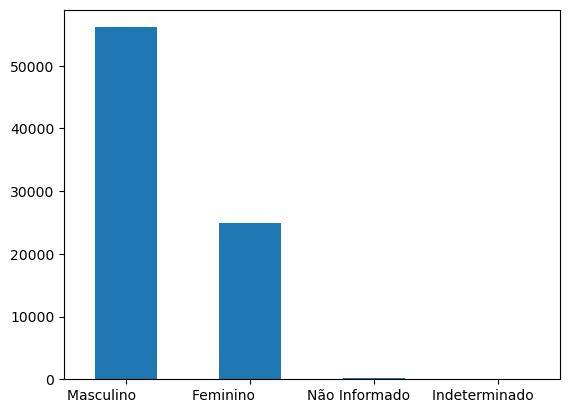

In [157]:
df2['Sexo'].value_counts().plot.bar(rot=0,stacked=True)


### 2) Qual a quantidade de responsável ( empregador, sindicato, médico, segurado, autoridade pública) pela emissão da CAT ?

In [100]:
df2['Emitente CAT'].value_counts()

Empregador              80173
Segurado/Dependente       488
Sindicato                 392
Médico                    148
Autoridade Pública         63
Name: Emitente CAT, dtype: int64

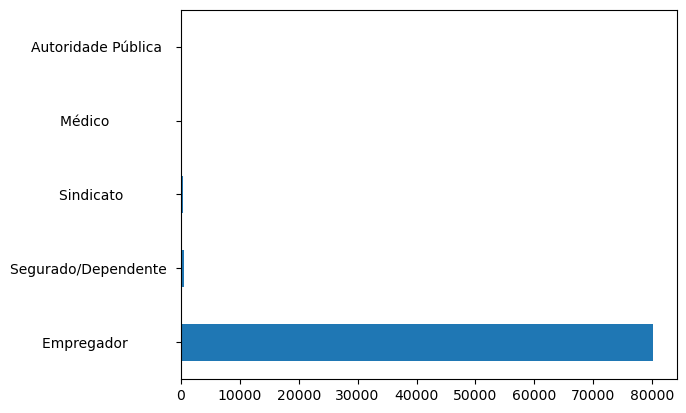

In [159]:
df2['Emitente CAT'].value_counts().plot.barh()

### 3) Quais são as 5 maiores partes do corpo atingida ?

In [107]:
df2['Parte Corpo Atingida'].value_counts()

Dedo                    22678
Pe (Exceto Artelhos)     7184
Mao (Exceto Punho ou     6473
Joelho                   3372
Olho (Inclusive Nerv     3036
Perna (Do Tornozelo,     2911
Partes Multiplas - A     2552
Perna (Entre O Torno     2461
Articulacao do Torno     2407
Cabeca, Nic              2335
Ombro                    2313
Braco (Entre O Punho     2275
Membros Superiores,      2204
Punho                    2182
Antebraco (Entre O P     1878
Membros Inferiores,      1820
Dorso (Inclusive Mus     1784
Face, Partes Multipl     1575
Sistema Nervoso          1114
Cabeca, Partes Multi      784
Tronco, Nic               767
Tronco, Parte Multip      755
Quadris (Inclusive P      740
Cotovelo                  738
Torax (Inclusive Org      709
Braco (Acima do Coto      571
Coxa                      556
Artelho                   531
Boca (Inclusive Labi      472
Abdome (Inclusive Or      296
Aparelho Respiratori      278
Pescoco                   252
Nariz (Inclusive Fos      250
Sistema Mu

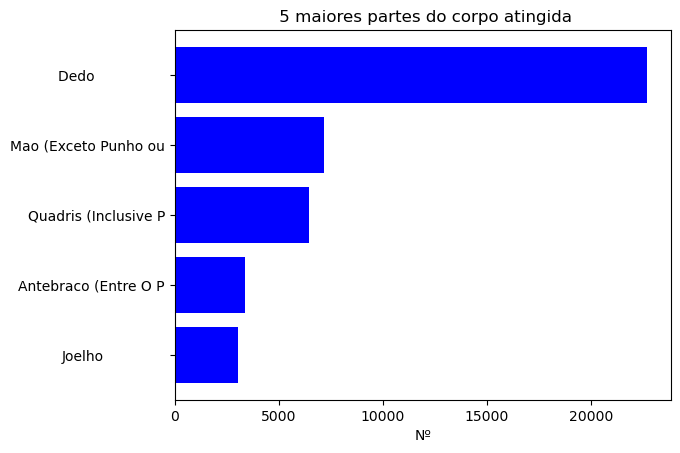

In [121]:
# rank gráfico das 5 maiores partes do corpo atingida
fig, ax = plt.subplots()
plt.style.use('ggplot')
plt.rcdefaults()
y_pos = np.arange(len(df2['Parte Corpo Atingida'].value_counts()[:5]))
values = df2['Parte Corpo Atingida'].value_counts()[:5]
partes = df2['Parte Corpo Atingida'].unique()[:5]

ax.barh(y_pos, values, align='center', color='blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(partes)
ax.invert_yaxis()
ax.set_xlabel('Nº')
ax.set_title(' 5 maiores partes do corpo atingida')
plt.show()

### 4) Qual o tipo de acidente mais comum ?

In [110]:
# verificando com value_counts()
df2['Tipo do Acidente'].value_counts()

Típico                  76368
Trajeto                  3763
Doença                   1133
Name: Tipo do Acidente, dtype: int64

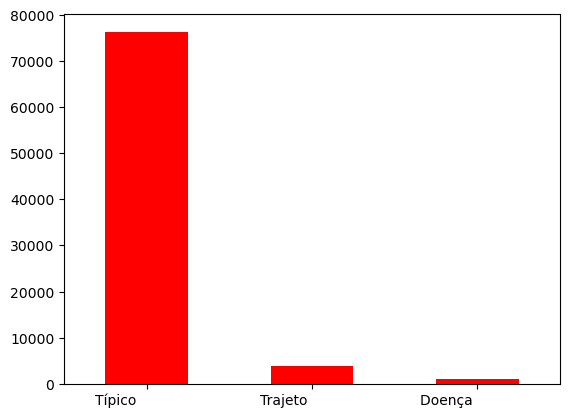

In [153]:
df2['Tipo do Acidente'].value_counts().plot.bar(color='red',rot=0)

##### O acidente tipico é ocorre em um momento no horário do trabalho e no ambiente , a pessoa se descuidou ou até mesmo falta de proteção

### 5) Quais as 5 maiores classificação Brasileira de Ocupações apresenta um número elevado de acidentes ?

In [115]:
df2['CBO'].value_counts()

                        8356
322205-Tec. de Enfer    5559
784205-Alimentador d    5155
782510-Motorista de     1971
717020-Servente de O    1902
                        ... 
777110-Carpinteiro N       1
321310-Tec. em Carci       1
374105-Tec. Gravação       1
821430-Oper. Escória       1
328110-Taxidermista        1
Name: CBO, Length: 1480, dtype: int64

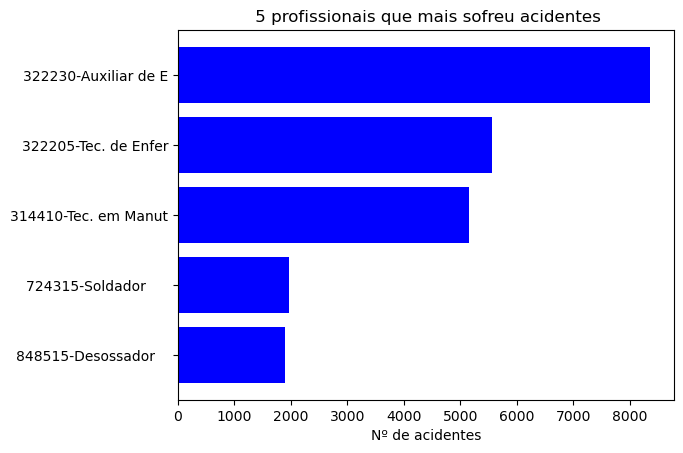

In [136]:
# rank gráfico dos 5 profissionais que mais sofreu acidentes
plt.style.use('ggplot')
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(df2['CBO'].value_counts()[:5]))
values = df2['CBO'].value_counts()[:5]
claf = df2['CBO'].unique()[:5]

ax.barh(y_pos, values, align='center', color='blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(claf)
ax.invert_yaxis()
ax.set_xlabel('Nº de acidentes')
ax.set_title(' 5 profissionais que mais sofreu acidentes')
plt.show()

#### Um dos 5 profissionais que mais sofreu acidentes foi:
1. Auxiliar de enfermagem 
2. Técnico de enfermagem 
3. Técnico em manutenção de máquinas
4. Soldador
5. Açougueiro desossador

### 6) Quais lesões são mais frequentes ?

In [127]:
df2['Natureza da Lesão'].value_counts()

Corte, Laceracao, Fe    18545
Fratura                 12747
Lesao Imediata, Nic     11130
Contusao, Esmagament     9387
Distensao, Torcao        6317
Escoriacao, Abrasao      5225
Luxacao                  5056
Queimadura ou Escald     2574
Lesoes Multiplas         2190
Doenca, Nic              1672
Lesao Imediata           1006
Inflamacao de Articu      809
Amputacao ou Enuclea      782
Queimadura Quimica (      762
Doenca Contagiosa ou      611
Perda ou Diminuicao       563
Envenenamento Sistem      310
                          298
Choque Eletrico e El      296
Concussao Cerebral        278
Dermatose (Erupcao,       267
Outras Lesoes, Nic        222
Hernia de Qualquer N       82
Asfixia, Estrangulam       47
Efeito de Radiacao (       31
Intermacao, Insolaca       23
Esforco Excessivo ao       21
Pneumoconiose (Silic        8
Congelamento, Geladu        5
Name: Natureza da Lesão, dtype: int64

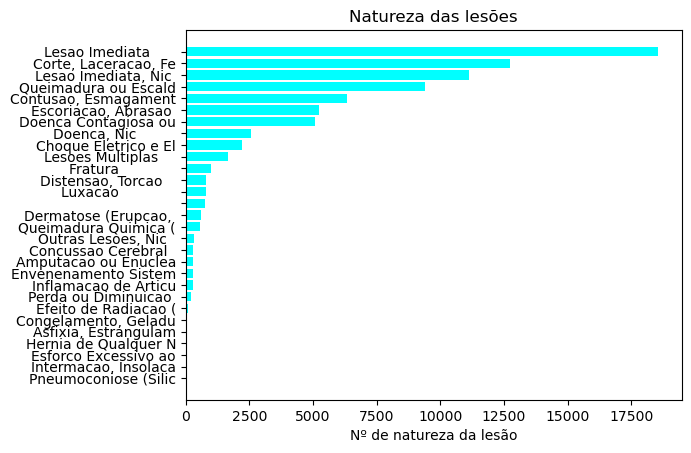

In [135]:
plt.style.use('ggplot')
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(df2['Natureza da Lesão'].value_counts()))
values = df2['Natureza da Lesão'].value_counts()
lesao = df2['Natureza da Lesão'].unique()

ax.barh(y_pos, values, align='center', color='#00FFFF')
ax.set_yticks(y_pos)
ax.set_yticklabels(lesao)
ax.invert_yaxis()
ax.set_xlabel('Nº de natureza da lesão')
ax.set_title('Natureza das lesões')

plt.show()

### 7) Onde estão os empregadores ?

In [138]:
df2['UF_empregador'].value_counts()

São Paulo               29551
Minas Gerais             8696
Rio Grande do Sul        7003
Paraná                   6850
Santa Catarina           5358
Rio de Janeiro           5060
Goiás                    2325
Bahia                    2003
Mato Grosso              1946
Espírito Santo           1899
Pernambuco               1598
Pará                     1363
Mato Grosso do Sul       1341
Ceará                    1237
Distrito Federal         1036
Amazonas                  821
Rio Grande do Norte       551
Alagoas                   478
Rondônia                  474
Maranhão                  460
Paraíba                   331
Sergipe                   304
Piauí                     204
Tocantins                 174
Roraima                    76
Acre                       64
Amapá                      61
Name: UF_empregador, dtype: int64

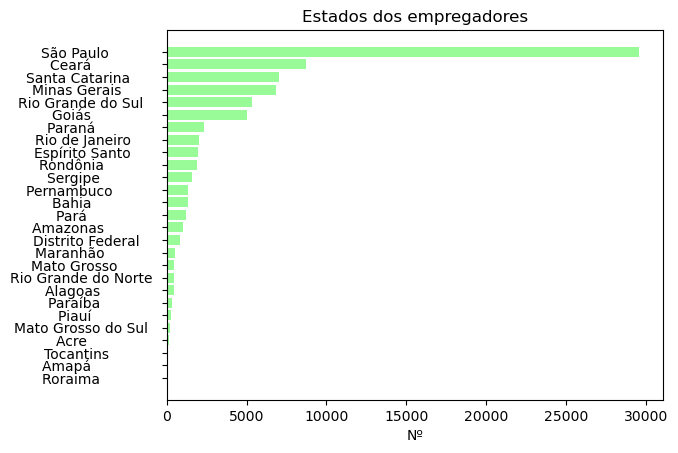

In [141]:
plt.style.use('ggplot')
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(df2['UF_empregador'].value_counts()))
values = df2['UF_empregador'].value_counts()
ufs = df2['UF_empregador'].unique()

ax.barh(y_pos, values, align='center', color='#98FB98')
ax.set_yticks(y_pos)
ax.set_yticklabels(ufs)
ax.invert_yaxis()
ax.set_xlabel('Nº')
ax.set_title('Estados dos empregadores')

plt.show()